In [1]:
!pip install --upgrade --no-cache-dir gdown

  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=2be0d63095deacada5f43f991aad0b978ff544535b623716b68d0b36c2d0a7b6
  Stored in directory: /tmp/pip-ephem-wheel-cache-ltntil6p/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown


In [2]:
!gdown --id 153xVcxm1ZjnEoaJTAEvqfVLq2H2gQzor

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=153xVcxm1ZjnEoaJTAEvqfVLq2H2gQzor
To: /kaggle/working/datasets-cardboard.zip
100%|██████████████████████████████████████| 52.0M/52.0M [00:00<00:00, 86.8MB/s]


In [3]:
!unzip -q ./datasets-cardboard.zip -d ./

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [5]:
########### YOUR CODE HERE ################
"""Khai báo tham số batchsize, shape image phù hợp 
với model các bạn sẽ xây dựng và đường dẫn đến data 
chứa 3 folder train, test và val"""

BATCH_SIZE  = 1
IMG_HEIGHT  = 256
IMG_WIDTH   = 256
IMG_CHANNEL = 3

# Path tới folder de-makeup data 
PATH = "./datasets/"
###########################################
BUFFER_SIZE = 50

In [6]:
def load(image_file):
    """Thực hiện các bước load ảnh và xử lý ảnh cơ bản
    Parameters
    ----------
    image_path : string 
        Path dẫn đến file ảnh.

    Returns
    -------
    input_image: tf.Tensor (tf.float32)
        ảnh input cho model (ảnh face đã makeup).
    target_image: tf.Tensor (tf.float32)
        ảnh target cho model (ảnh face chưa makeup).
    """
    # Read image
    input_image = tf.io.read_file(image_file)
    input_image = tf.image.decode_jpeg(input_image)
    
    mask_path = tf.strings.regex_replace(image_file, "images", "labels")
    
    target_image = tf.io.read_file(mask_path)
    target_image = tf.image.decode_jpeg(target_image)

    #Resize image 
    input_image  = tf.image.resize(input_image, (IMG_HEIGHT, IMG_WIDTH))
    target_image  = tf.image.resize(target_image, (IMG_HEIGHT, IMG_WIDTH))
    
    # Convert to float32
    input_image  = tf.cast(input_image, tf.float32)
    target_image = tf.cast(target_image, tf.float32)

    return input_image, target_image

2022-03-19 10:44:14.177266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


(256, 256, 3)
(256, 256, 1)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(255.0, shape=(), dtype=float32)
Unique(y=<tf.Tensor: shape=(87,), dtype=float32, numpy=
array([0.0000e+00, 5.0000e-01, 6.2750e+01, 1.2525e+02, 1.2550e+02,
       1.2500e+02, 1.2750e+02, 1.2650e+02, 1.2275e+02, 6.2000e+01,
       6.2500e+01, 1.2600e+02, 1.2450e+02, 1.8625e+02, 2.4900e+02,
       2.5000e+02, 2.5025e+02, 2.4950e+02, 2.4975e+02, 2.5050e+02,
       2.4800e+02, 2.5175e+02, 2.5250e+02, 2.5375e+02, 2.5450e+02,
       2.5400e+02, 2.5500e+02, 2.5475e+02, 1.2775e+02, 2.5350e+02,
       2.5300e+02, 2.5125e+02, 2.5150e+02, 2.5100e+02, 2.4525e+02,
       7.5000e-01, 2.5425e+02, 1.2925e+02, 2.4850e+02, 2.4875e+02,
       1.2675e+02, 1.2700e+02, 2.4750e+02, 1.2425e+02, 2.4775e+02,
       2.4825e+02, 2.4700e+02, 1.2625e+02, 1.2575e+02, 2.4725e+02,
       6.5250e+01, 1.2800e+02, 1.2975e+02, 1.0000e+00, 4.0000e+00,
       3.7500e+00, 4.5000e+00, 4.2500e+00, 4.7500e+00, 5.0000e+00,
       1.3000e+02, 1.3025e+02,

2022-03-19 10:44:14.260686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 10:44:14.261377: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-19 10:44:14.264242: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-19 10:44:14.265004: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

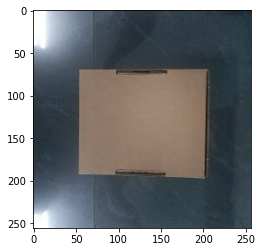

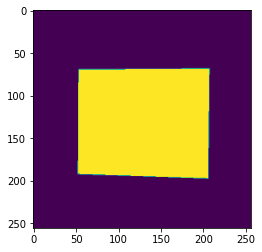

In [7]:
path_test = "./datasets/train/images/0.jpg"

input_image, target_image = load(path_test)


print(input_image.shape)
print(target_image.shape)

print(tf.math.reduce_min(target_image))
print(tf.math.reduce_max(target_image))
# print(target_image)

x = tf.reshape(target_image, shape=(-1,))

print(tf.unique(x))

# casting to int for matplotlib to show the image
plt.figure()
plt.imshow(input_image/255.0)
plt.figure()
plt.imshow(target_image/255.0)

In [8]:
# normalizing the images to [-1, 1]
def normalize(input_image, target_image):
    input_image  = (input_image / 127.5) - 1
    target_image = (target_image / 127.5) - 1

    return input_image, target_image

def load_image_train(image_file):

    input_image, target_image = load(image_file)
    input_image, target_image = normalize(input_image, target_image)

    return input_image, target_image

def load_image_test(image_file):
    input_image, target_image = load(image_file)
    input_image, target_image = normalize(input_image, target_image)

    return input_image, target_image

In [9]:
# train_dataset
train_dataset = tf.data.Dataset.list_files(PATH+'train/images/*.jpg')
train_dataset = train_dataset.map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(1)

# test_dataset
test_dataset = tf.data.Dataset.list_files(PATH+'test/images/*.jpg')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(1)

In [10]:
class BuildRes50Unet():
    def __init__(self):
        pass
    
    def conv_block(self, inputs, num_filters):
        """Two convolution 
        Parameters
        ----------
        inputs: tf.Tensor 
        num_filters: int 

        Returns
        -------
        x: tf.Tensor 
            inputs pass 2 convlution block (Conv2D, LayerNormalization, Activation function LeakyReLU)
        """
        # Init weight
        initializer = tf.random_normal_initializer(0., 0.02)

        # Conv 1
        x = layers.Conv2D(num_filters, 3, strides=1, padding='same',
                          kernel_initializer=initializer, use_bias=False)(inputs)
        x = layers.LayerNormalization()(x)
        x = layers.LeakyReLU()(x)

        # Conv 2
        x = layers.Conv2D(num_filters, 3, strides=1, padding='same',
                          kernel_initializer=initializer, use_bias=False)(x)
        x = layers.LayerNormalization()(x)
        x = layers.LeakyReLU()(x)
        
        return x
    
    
    def upsample_concate_block(self, inputs, skip_connection, num_filters):
        """Upsampling, skip connection and via 2 convolution block
        Parameters
        ----------
        inputs: tf.Tensor 
        skip_connection: tf.Tensor 
        num_filters: int 

        Returns
        -------
        x: tf.Tensor 
        """
        
        # Upsampling 
        x = layers.UpSampling2D(interpolation='bilinear')(inputs)

        # Concatenate tensor upsample and skip connection
        x = layers.Concatenate()([x, skip_connection])

        # Via 2 convolution block
        x = self.conv_block(x, num_filters)

        return x    
    
    def build_model(self, input_shape):
        """Build Unet architecture use pretrained backbone (encoder)
        Parameters
        ----------
        input_shape: Tuple  
            
        Returns
        -------
        model: tf.keras.Model
            Unet model 
        """
        # Input layer 
        inputs = layers.Input(shape=input_shape)

        # Encoder

        # Get pretrained backbone 
        """ Pre-trained ResNet50 Model """
        resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)

        """ Encoder """
        s1 = resnet50.layers[0].output         
        s2 = resnet50.get_layer("conv1_relu").output        
        s3 = resnet50.get_layer("conv2_block3_out").output  
        s4 = resnet50.get_layer("conv3_block4_out").output  

        """ Bridge """
        b1 = resnet50.get_layer("conv4_block6_out").output  

        """ Decoder """
        d1 = self.upsample_concate_block(b1, s4, 512)             
        d2 = self.upsample_concate_block(d1, s3, 256)                  
        d3 = self.upsample_concate_block(d2, s2, 128)                   
        d4 = self.upsample_concate_block(d3, s1, 64)  
        
        """ Output """
        # Use tanh for output [-1: 1]
        outputs = layers.Conv2D(filters=1, kernel_size=(1,1), activation='tanh',
                                      kernel_initializer='he_normal', use_bias=False)(d4)
        
        # Value input and output [-1:1]
        model = Model(inputs=[inputs], outputs=[outputs])
        
        return model

In [11]:
model = BuildRes50Unet()
res50Unet = model.build_model(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL))

94781440/94765736 [==============================] - 1s 0us/step


In [12]:
res50Unet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [13]:
def evaluate(model, epoch, val_ds):  
    psnr_mean = 0.0
    count = 0

    # Get input and targets from validation dataset
    for inputs, targets in val_ds:
        fake = model([inputs], training=True)
         
        # Scale to [0,1] and compute PSNR
        psnr = tf.image.psnr(fake*0.5 + 0.5, targets*0.5 + 0.5, max_val=1.0)

        __psnr_mean = tf.math.reduce_mean(psnr)
        
        psnr_mean += __psnr_mean
        count =count + 1
    
    psnr_mean = psnr_mean/count
    print('-------- psnr: ', psnr_mean.numpy(), '   ----- epoch: ', epoch, '  count: ', count)
    
    return psnr_mean
    
def generate_images(model, inputs, targets, epoch, pnsr):
    # Show images genearation from validation dataset
    fake = model([inputs], training=True)
    plt.figure(figsize=(15,20))
    
    # Get one images
    display_list = [inputs[0], targets[0], fake[0]]
    title = ['Input', 'Real', 'Predicted']    

#     # Save output better performance than 
#     output = np.concatenate([display_list[0], display_list[1], display_list[2]], axis=1)
#     output = (output * 0.5 + 0.5) * 255
#     output = output.astype(np.uint8)
#     Image.fromarray(output).save(f"./save_result/validation_results/epoch:{epoch} pnsr:{pnsr}.png")
    
    # Show output
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()        

In [14]:
os.makedirs("./save_result", exist_ok=True)
os.makedirs("./save_result/validation_results", exist_ok=True)
os.makedirs("./save_result/testing_results", exist_ok=True)
os.makedirs("./save_result/save_model", exist_ok=True)

In [15]:
class PeceptualLoss():
    def __init__(self, input_shape = (256,256,3)):
        self.input_shape = input_shape    
    
    def get_extractor(self):
        """
        Parameters
        ----------
        input_shape: tuple 

        Returns
        -------
        model:  tf.keras.Model 
            pretrained model (vgg19) to extract feature for perceptual loss
        """

        vgg = VGG19(input_shape= self.input_shape, include_top=False, weights='imagenet')
        model = tf.keras.Model(vgg.input, vgg.layers[20].output)
        
        return model
        
        
    def percep_loss(self, target_image, fake_image):

        """
        Parameters
        ----------
        target_image: tf.tensor  
        fake_image: tf.tensor  
        Returns
        -------
        loss:  tf.tensor
        """
        
        # Get feature
        model_vgg = self.get_extractor()
        
        # Get mean square error
        mean_squared_error = tf.keras.losses.MeanSquaredError()

        # Change chanel = 3 if chanel = 1
        if target_image.shape[3]==1:
            target_image = tf.concat([target_image, target_image, target_image], 3)

        if fake_image.shape[3]==1:
            fake_image = tf.concat([fake_image, fake_image, fake_image], 3)

        # Get feature for taget and fake image
        target_image_feature = model_vgg(target_image)
        fake_image_feature = model_vgg(fake_image)
        
        # Compute mean square error
        loss = mean_squared_error(target_image_feature, fake_image_feature)    

        return loss        

In [16]:
# Init perceptual loss
per_loss = PeceptualLoss(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL))

In [17]:
def generator_loss(fake, target, loss_type='L1'):
    loss_list = ["L1", "Percep"]
    assert loss_type in loss_list

    # L1 loss
    if loss_type == loss_list[0]:
        loss = tf.reduce_mean(tf.abs(fake-target))

    # Perceptual Loss
    elif loss_type == loss_list[1]:
        loss = per_loss.percep_loss(target, fake)
    
    return loss

In [18]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4, beta_1=0.5)

In [19]:
@tf.function
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        # output
        fake = res50Unet([inputs], training=True)     
        loss = generator_loss(fake, targets)
        
    generator_gradients = tape.gradient(loss, res50Unet.trainable_variables)
    generator_optimizer.apply_gradients(zip(generator_gradients, res50Unet.trainable_variables))
    
    return loss

    
    
def fit(train_ds, epochs, val_ds):
    best_pnsr = 0.0
    for epoch in range(epochs):
        # Train
        total_loss = 0.0
        for inputs, targets in train_ds:
            loss = train_step(inputs, targets)
            total_loss = total_loss + loss

        total_loss = (total_loss/len(train_ds))*100
        print('epoch: {}   loss: {}'.format(epoch, total_loss))
        
        pnsr = evaluate(res50Unet, epoch, val_ds)        
        if best_pnsr < pnsr:
            best_pnsr = pnsr
            res50Unet.save("./save_result/save_model/model-resnet-50-unet.h5")
            for inputs, targets in val_ds.take(1):
                generate_images(res50Unet, inputs, targets, epoch, best_pnsr)
                print("Save result successfully!")


2022-03-19 10:44:20.800629: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-19 10:44:26.330992: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


epoch: 0   loss: 53.059532165527344
-------- psnr:  5.546857    ----- epoch:  0   count:  50


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


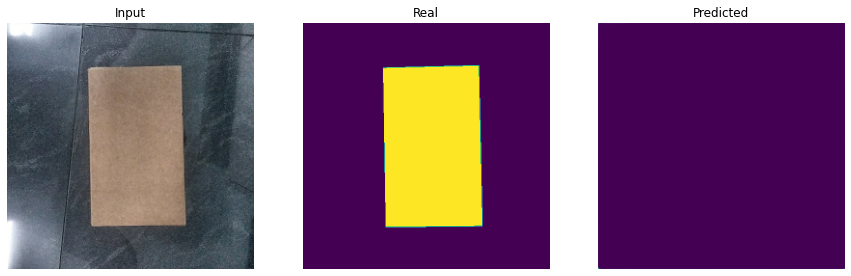

Save result successfully!
epoch: 1   loss: 52.93442153930664
-------- psnr:  5.546816    ----- epoch:  1   count:  50
epoch: 2   loss: 54.41372299194336
-------- psnr:  5.547287    ----- epoch:  2   count:  50


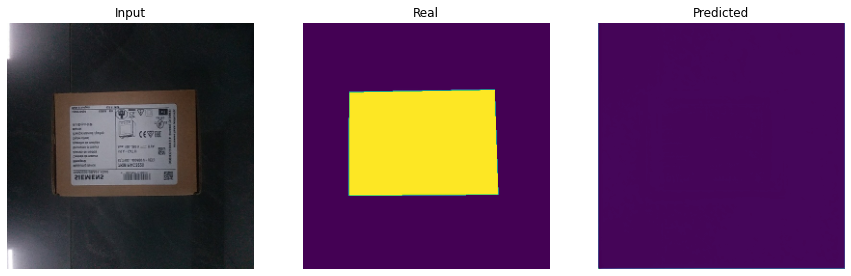

Save result successfully!
epoch: 3   loss: 52.93603515625
-------- psnr:  5.546873    ----- epoch:  3   count:  50
epoch: 4   loss: 52.934383392333984
-------- psnr:  5.546809    ----- epoch:  4   count:  50
epoch: 5   loss: 52.93377685546875
-------- psnr:  5.5467644    ----- epoch:  5   count:  50
epoch: 6   loss: 52.9334716796875
-------- psnr:  5.5467463    ----- epoch:  6   count:  50
epoch: 7   loss: 52.93328094482422
-------- psnr:  5.5467362    ----- epoch:  7   count:  50
epoch: 8   loss: 52.9332160949707
-------- psnr:  5.546733    ----- epoch:  8   count:  50
epoch: 9   loss: 52.93311309814453
-------- psnr:  5.54674    ----- epoch:  9   count:  50
epoch: 10   loss: 53.11573028564453
-------- psnr:  5.5472436    ----- epoch:  10   count:  50
epoch: 11   loss: 52.93446731567383
-------- psnr:  5.5467772    ----- epoch:  11   count:  50
epoch: 12   loss: 52.933536529541016
-------- psnr:  5.5467443    ----- epoch:  12   count:  50
epoch: 13   loss: 52.933406829833984
-------- 

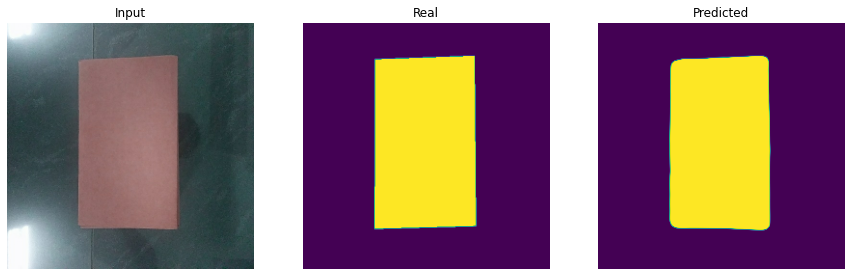

Save result successfully!
epoch: 105   loss: 1.8220096826553345
-------- psnr:  22.072311    ----- epoch:  105   count:  50


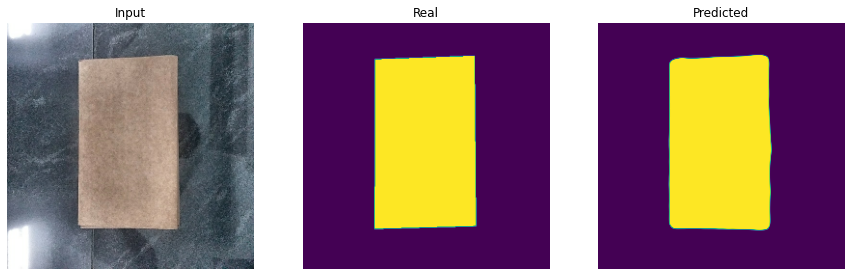

Save result successfully!
epoch: 106   loss: 1.178963541984558
-------- psnr:  22.163652    ----- epoch:  106   count:  50


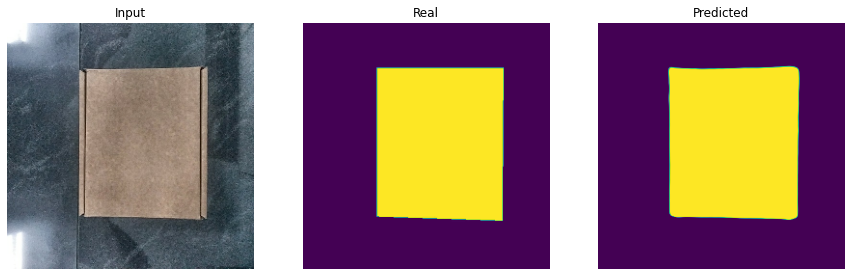

Save result successfully!
epoch: 107   loss: 1.0547312498092651
-------- psnr:  23.130056    ----- epoch:  107   count:  50


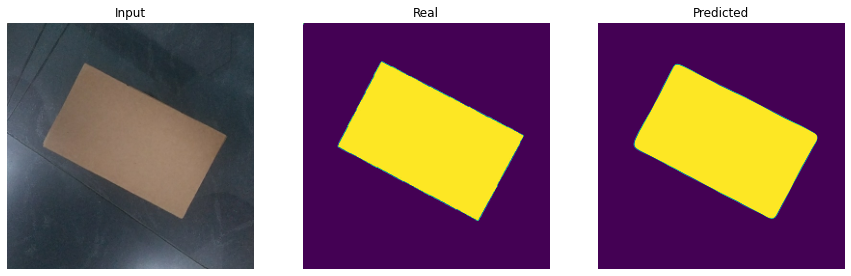

Save result successfully!
epoch: 108   loss: 0.9894909262657166
-------- psnr:  22.753704    ----- epoch:  108   count:  50
epoch: 109   loss: 0.8979489803314209
-------- psnr:  22.216936    ----- epoch:  109   count:  50
epoch: 110   loss: 0.8467757105827332
-------- psnr:  22.554916    ----- epoch:  110   count:  50
epoch: 111   loss: 0.7746694684028625
-------- psnr:  23.033655    ----- epoch:  111   count:  50
epoch: 112   loss: 0.7360514998435974
-------- psnr:  22.843603    ----- epoch:  112   count:  50
epoch: 113   loss: 0.7171257734298706
-------- psnr:  22.473133    ----- epoch:  113   count:  50
epoch: 114   loss: 0.661693274974823
-------- psnr:  22.639038    ----- epoch:  114   count:  50
epoch: 115   loss: 0.6008158326148987
-------- psnr:  22.481428    ----- epoch:  115   count:  50
epoch: 116   loss: 0.5791976451873779
-------- psnr:  22.895319    ----- epoch:  116   count:  50
epoch: 117   loss: 0.5603680610656738
-------- psnr:  22.870996    ----- epoch:  117   count:

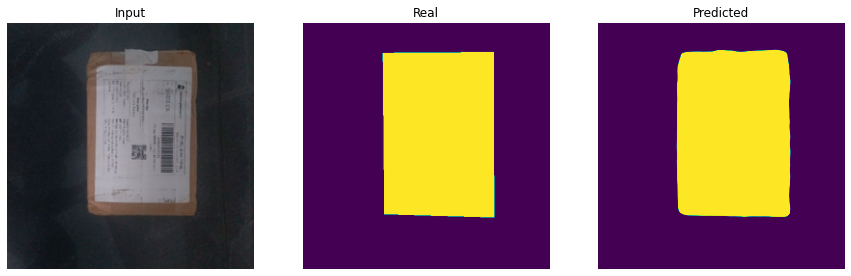

Save result successfully!
epoch: 120   loss: 0.4800010323524475
-------- psnr:  22.648603    ----- epoch:  120   count:  50
epoch: 121   loss: 0.468583881855011
-------- psnr:  22.74757    ----- epoch:  121   count:  50
epoch: 122   loss: 0.46650800108909607
-------- psnr:  22.832996    ----- epoch:  122   count:  50
epoch: 123   loss: 0.4447118043899536
-------- psnr:  22.89194    ----- epoch:  123   count:  50
epoch: 124   loss: 0.43033817410469055
-------- psnr:  23.169806    ----- epoch:  124   count:  50
epoch: 125   loss: 0.4215853810310364
-------- psnr:  22.876188    ----- epoch:  125   count:  50
epoch: 126   loss: 0.41146209836006165
-------- psnr:  22.676443    ----- epoch:  126   count:  50
epoch: 127   loss: 0.3930591642856598
-------- psnr:  23.020945    ----- epoch:  127   count:  50
epoch: 128   loss: 0.37968122959136963
-------- psnr:  22.646233    ----- epoch:  128   count:  50
epoch: 129   loss: 0.3729132413864136
-------- psnr:  22.764544    ----- epoch:  129   coun

In [20]:
EPOCHS = 150
fit(train_dataset, EPOCHS, test_dataset)